#### Importing Libraries 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

#### Reading the data 

In [13]:
pd.read_csv('twitter_sentiment.csv')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [17]:
cols = ['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv('twitter_sentiment.csv', names = cols)

In [19]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
train.shape

(74682, 4)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [27]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [29]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [35]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [37]:
train[train.isnull().any(axis=1)]

,ID,Topic,Sentiment,Text
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [39]:
train.dropna(inplace = True)

In [41]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

#### Checking for duplicate values

In [46]:
train.duplicated().sum()

2340

In [48]:
train[train.duplicated()]

,ID,Topic,Sentiment,Text
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
51,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
64,2411,Borderlands,Neutral,.. [
146,2425,Borderlands,Negative,"""What a bitch!"""
...,...,...,...,...
74505,9171,Nvidia,Neutral,This benchmarking comparison between Oculus Qu...
74510,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
74589,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74619,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


In [50]:
train[train.duplicated(keep = False)]

,ID,Topic,Sentiment,Text
18,2404,Borderlands,Positive,that was the first borderlands session in a lo...
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
48,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
...,...,...,...,...
74589,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74616,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74619,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74635,9193,Nvidia,Positive,Love EVERYTHING about it.


In [56]:
train.drop_duplicates(inplace = True)

In [58]:
train.duplicated().sum()

0

#### Visualization of count of differnet topics 

In [69]:
train['Topic'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

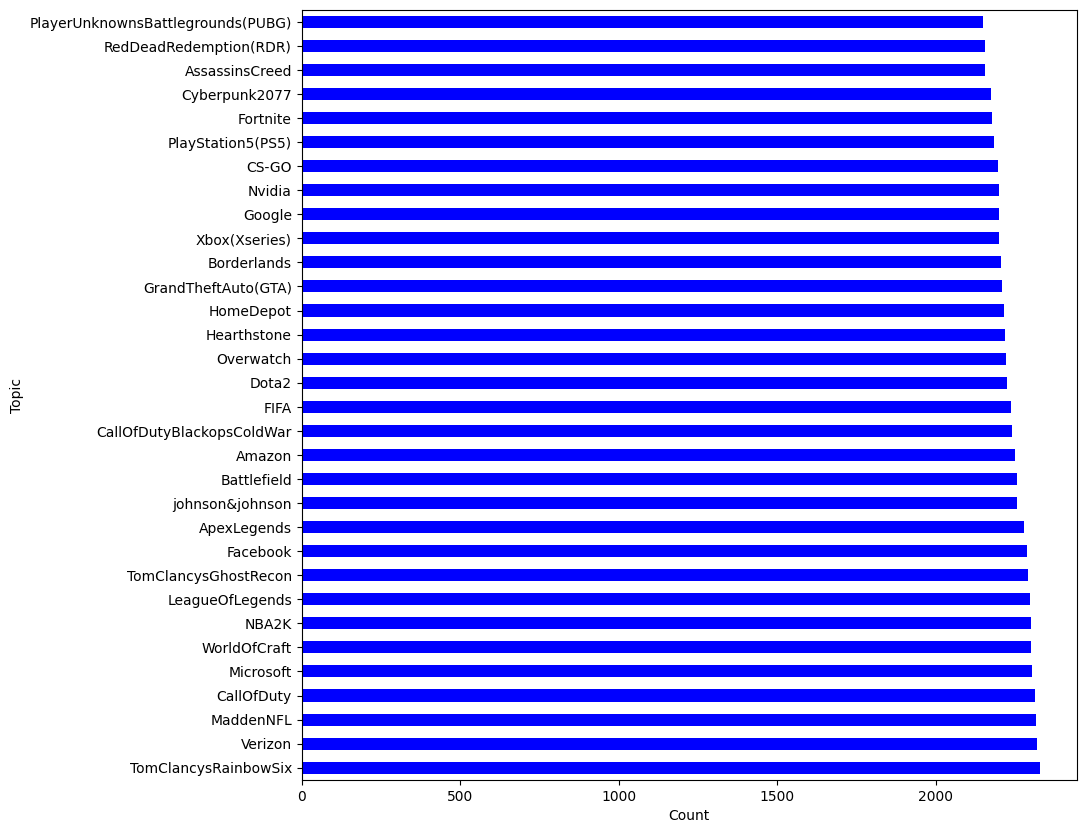

In [79]:
plt.figure(figsize=(10,10))
train['Topic'].value_counts().plot(kind = 'barh', color = 'b')
plt.xlabel("Count")
plt.show()

C:\Users\shres\AppData\Local\Temp\ipykernel_21560\3049895267.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Sentiment"], palette="coolwarm")


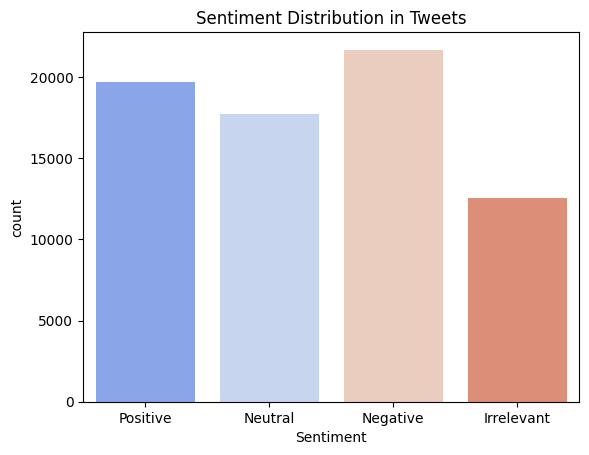

In [87]:
sns.countplot(x=train["Sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution in Tweets")
plt.show()

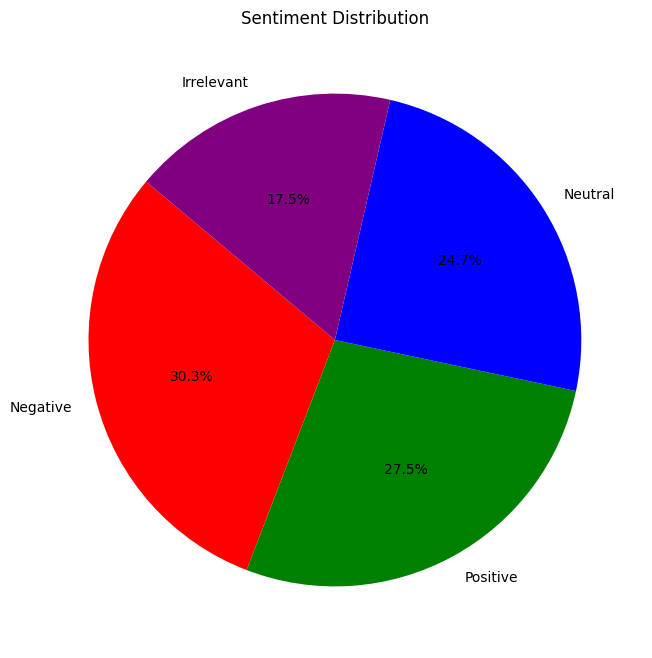

In [99]:
# calculate the sentiment for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create pie chart
plt.figure(figsize = (8,8))
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct = "%1.1f%%", startangle = 140, colors = ['red', 'green', 'blue', 'purple'])

plt.title("Sentiment Distribution")
plt.show()

#### Observation

- Most of the topic has negative sentiment

In [113]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


#### Sentiment Distribution topic-wise

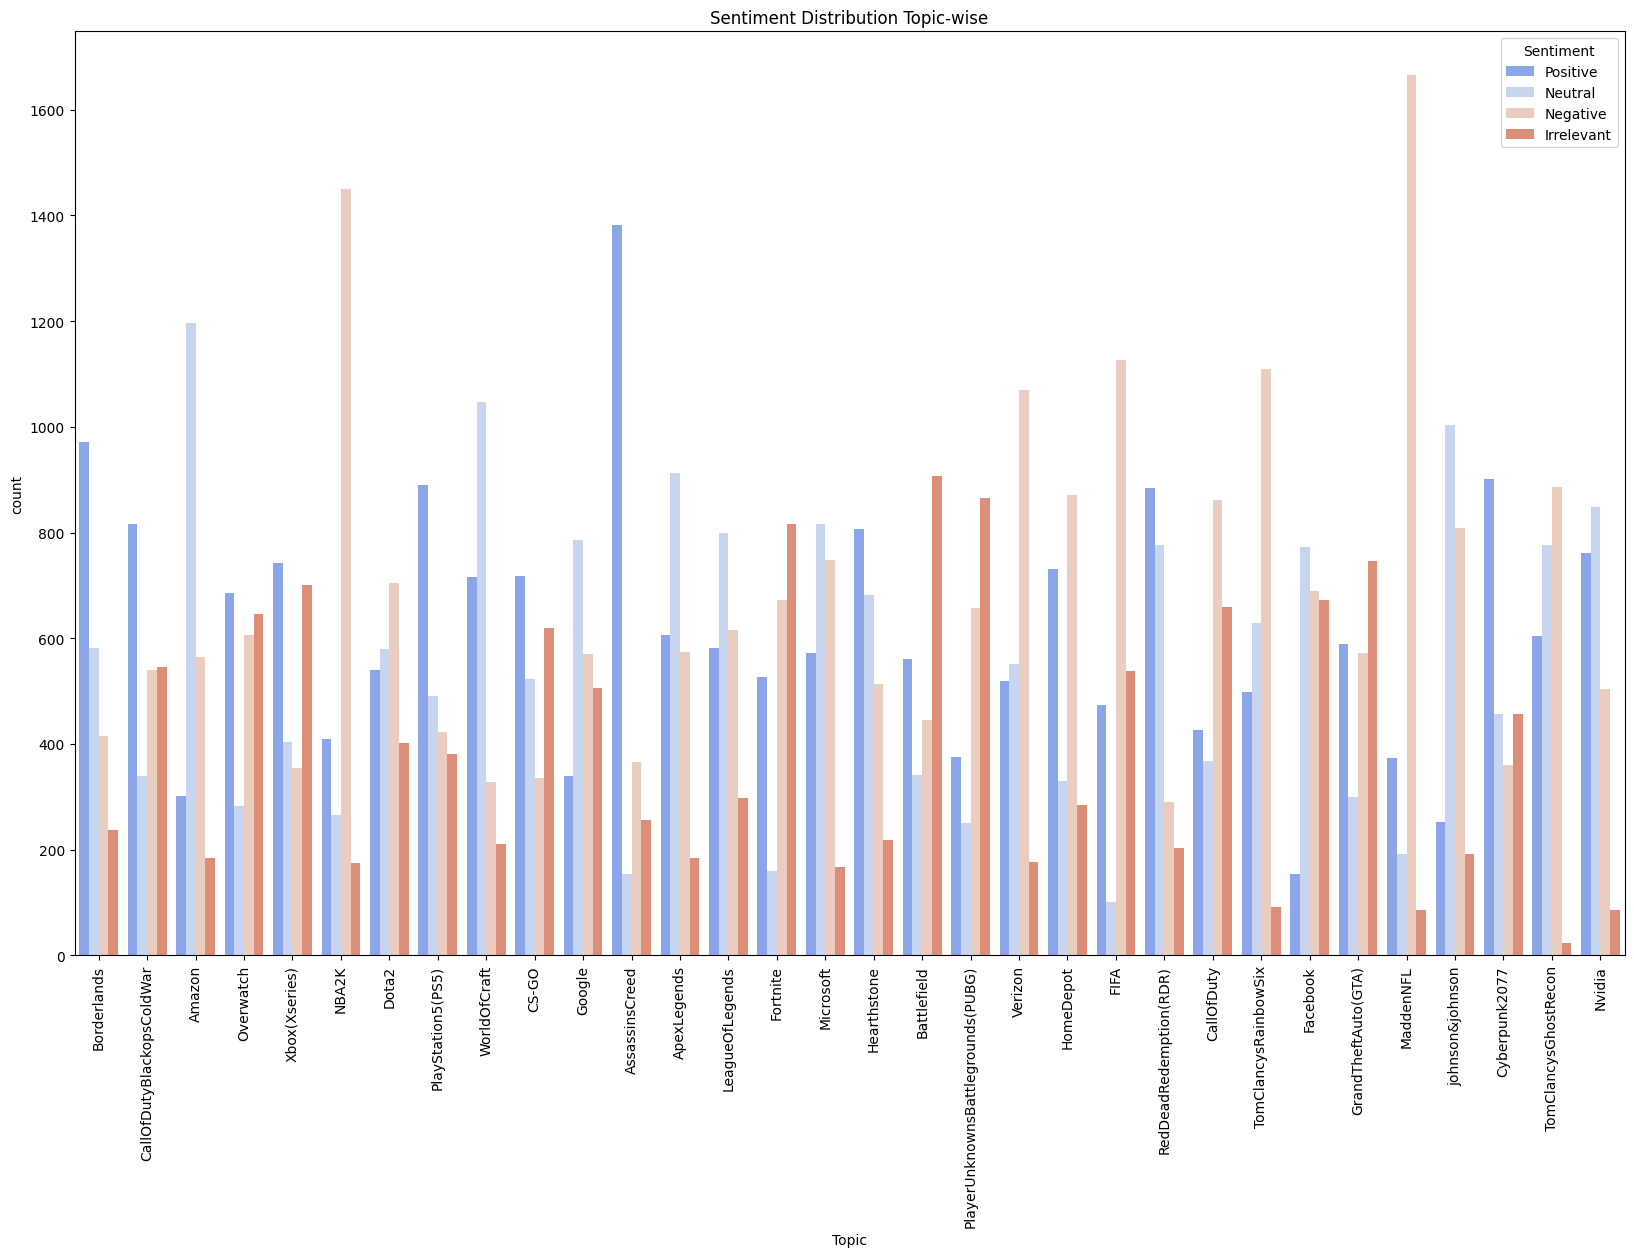

In [136]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'Topic', data = train, hue = 'Sentiment', palette = 'coolwarm')
plt.title("Sentiment Distribution Topic-wise")
plt.xticks(rotation = 90)
plt.show()

In [138]:
# Group by sentiment and Topic
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

#### Top 5 Topics with Negative Sentiments

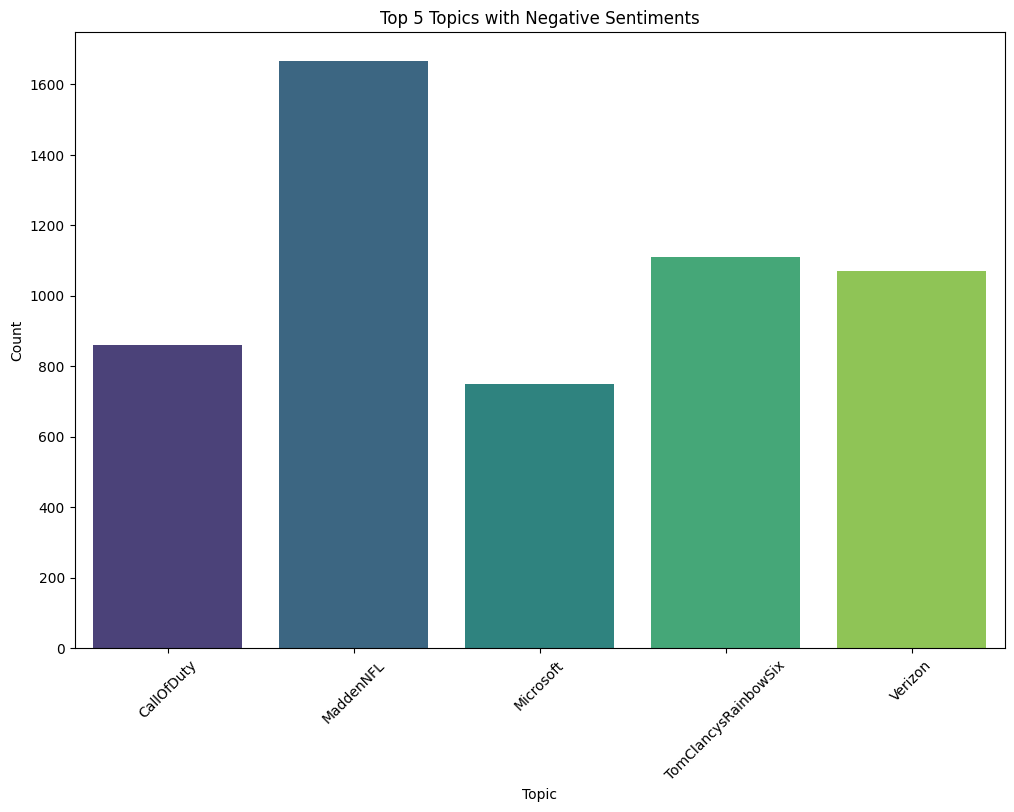

In [143]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', hue = 'Topic', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top 5 Topics with Positive Sentiments

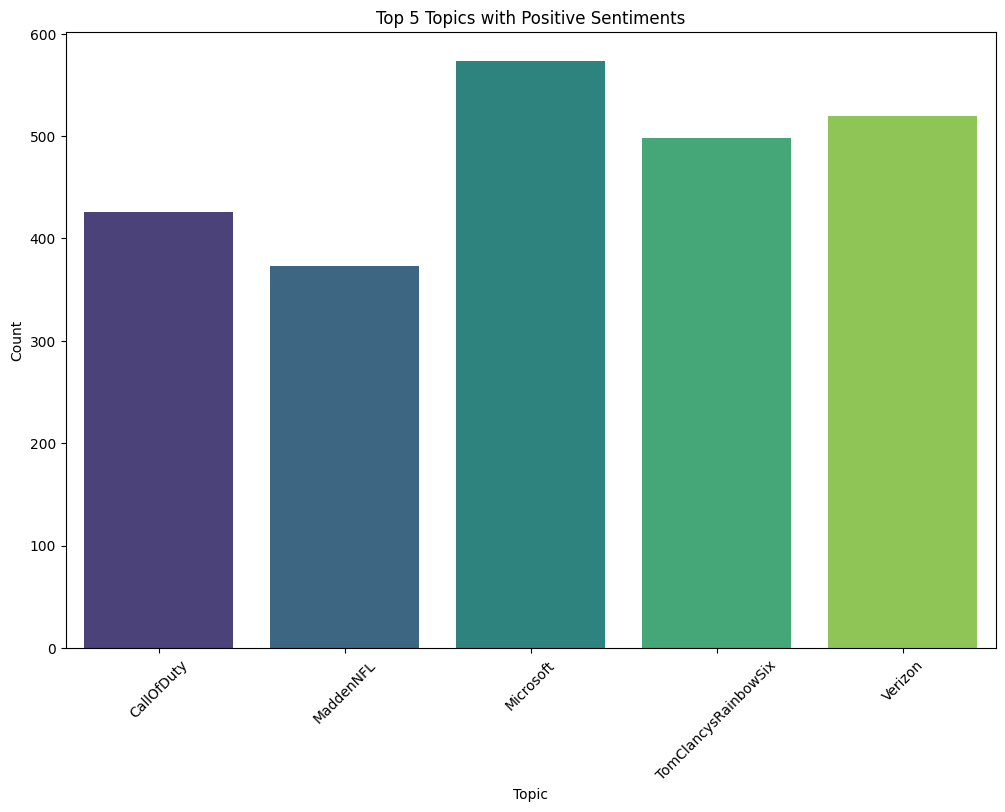

In [157]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', hue = 'Topic', palette='viridis')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top 5 Topics with Neutral Sentiments

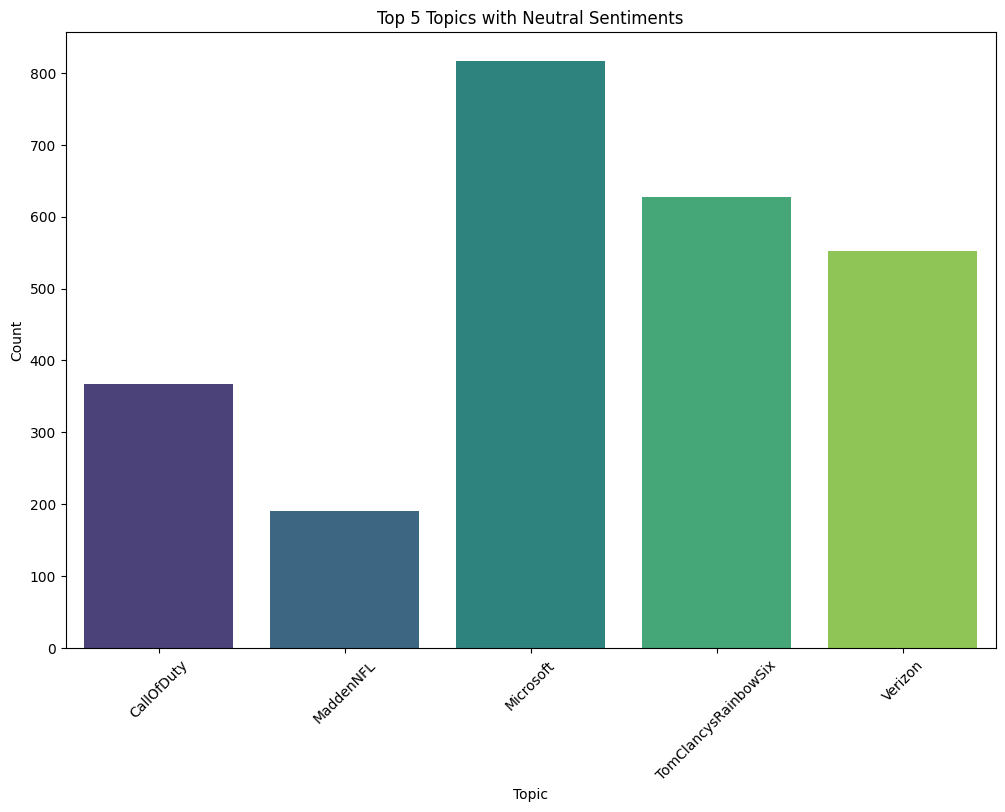

In [155]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', hue = 'Topic', palette='viridis')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top 5 Topics with Irrelevant  Sentiments

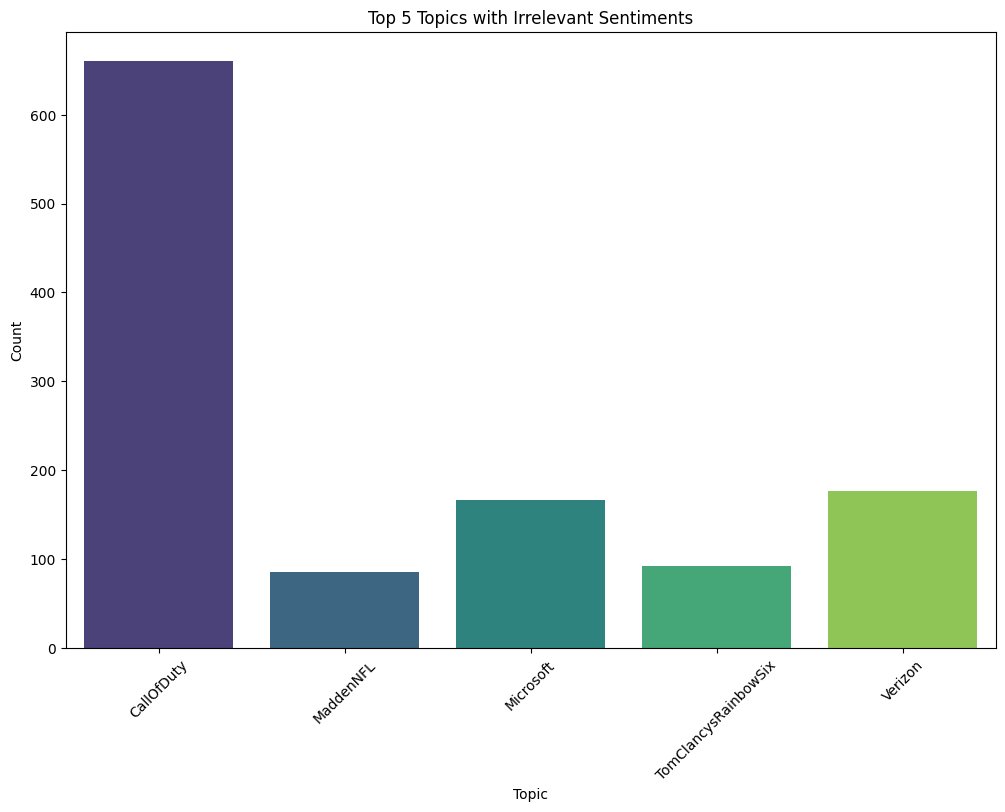

In [176]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', hue = 'Topic', palette='viridis')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [178]:
train['Topic'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

#### Sentiment Distribution in Google

In [191]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']
google_data

,ID,Topic,Sentiment,Text
23340,4401,Google,Neutral,Today's @Google's Greatest Hits: fire hydrant ...
23341,4401,Google,Neutral,Today's @ Google Greatest Hits: Fire hydrant a...
23342,4401,Google,Neutral,"Today's ""Greatest Achievement"" @ Google: Fire ..."
23343,4401,Google,Neutral,Today's @Google's Greatest Hits: fire garden l...
23344,4401,Google,Neutral,2008 Today's @Google's s Greatest Motor Hits :...
...,...,...,...,...
25632,4800,Google,Negative,Literally not okay
25633,4800,Google,Negative,Literally out of order
25635,4800,Google,Negative,Literally fucking okay
25636,4800,Google,Negative,18 Literally not okay


In [193]:
# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()
sentiment_counts

Sentiment
Neutral       785
Negative      570
Irrelevant    505
Positive      339
Name: count, dtype: int64

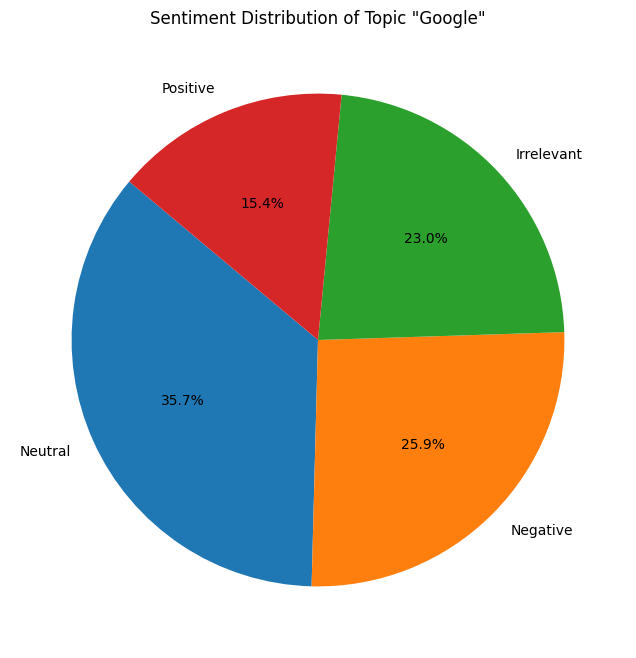

In [201]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

#### Sentiment Distribution in Microsoft

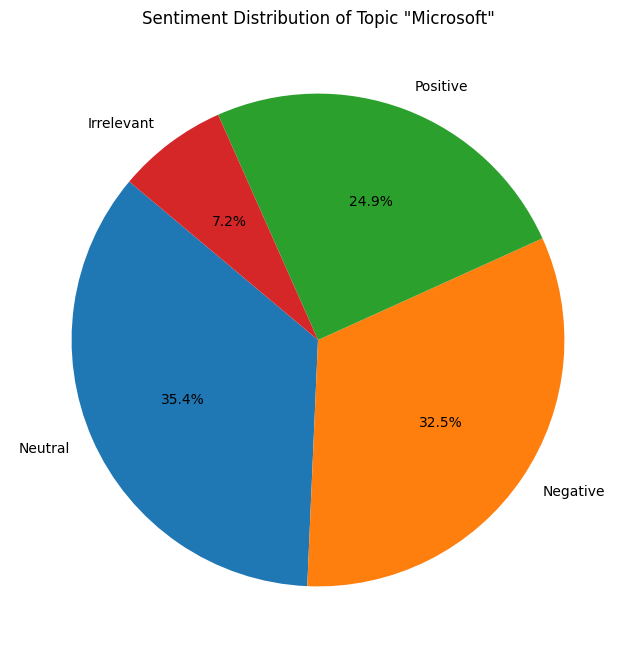

In [204]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [206]:
train['msg_len'] = train['Text'].apply(len)

In [210]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


#### Plot of message length distribution for training data

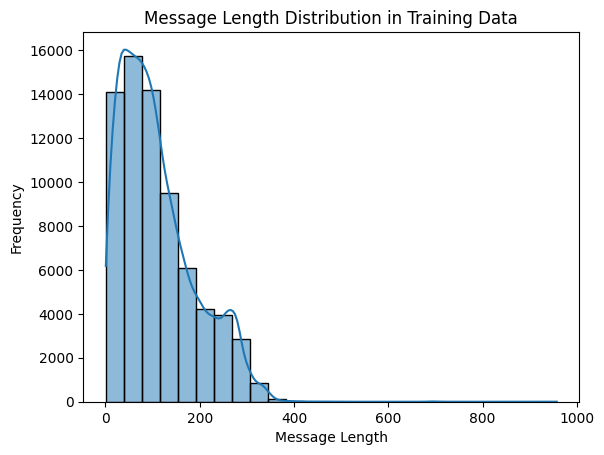

In [219]:
sns.histplot(train['msg_len'], bins = 25, kde = True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

#### Plot message length distribution by sentiment for training data

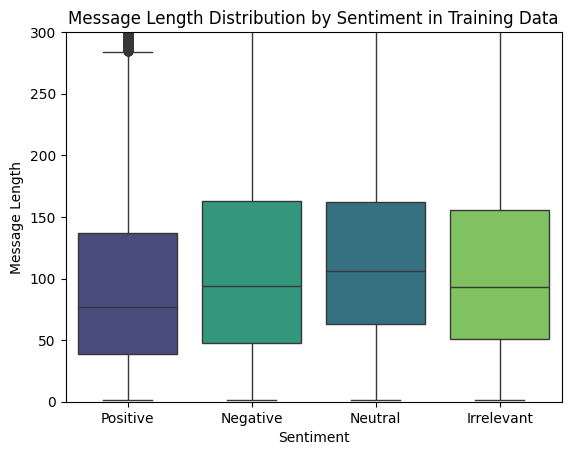

In [240]:
sns.boxplot(data = train, x = train['Sentiment'], y = 'msg_len', hue = 'Sentiment', palette = 'viridis', order = ['Positive', 'Negative', 'Neutral', 'Irrelevant'], legend = False)
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

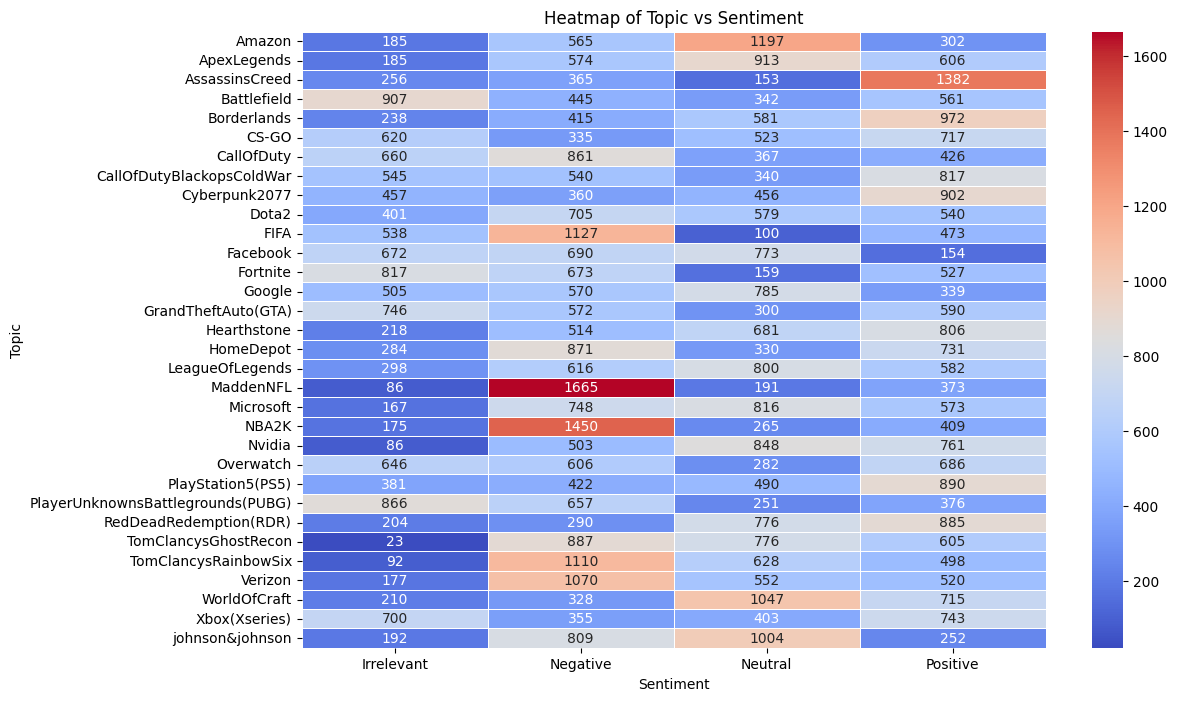

In [242]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

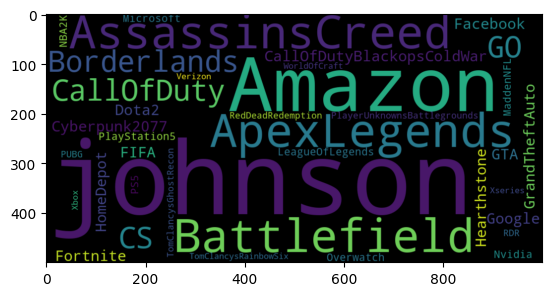

In [244]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

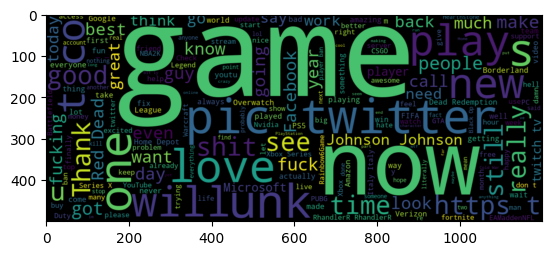

In [246]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

This project analyzes public sentiment on social media to understand opinions about different topics or brands. 
Using sentiment distribution pie charts, we identify whether topics like Google receive more positive, negative, or neutral feedback. 
A heatmap helps compare sentiment trends across multiple brands, revealing reputation insights. 
The WordCloud visualizes the most frequently discussed topics, highlighting popular brands. 
These analyses provide valuable business insights, enabling companies to monitor brand perception, improve customer satisfaction, and make data-driven decisions. 
Future extensions could include machine learning-based sentiment classification, time-series sentiment trends, and topic modeling for deeper analysis.